# Quantitative Analyst Intern - Assignment

Manav Shah

In [27]:
import requests
import json
import numpy as np
import pandas as pd

In [141]:
query = """query trades{
  swaps(where:{pair: "0xd3d2e2692501a5c9ca623199d38826e513033a17"}, orderBy: timestamp, orderDirection: desc) {
    id
    timestamp
    amount0In
    amount1In
    amount0Out
    amount1Out
    pair{
    token0{
        symbol
        name
    }
    token1{
        symbol
        name
    }
    }
  }
}"""


In [142]:
url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2'
r = requests.post(url, json={'query': query})
print(r.status_code)
print(r.text)

200
{"data":{"swaps":[{"amount0In":"439.702978909219990174","amount0Out":"0","amount1In":"0","amount1Out":"3.811243787133159781","id":"0x89d53cc559c48b18440c572cdc6a746323da1e451ca5b48b1cbe5669ac2f302b-0","pair":{"token0":{"name":"Uniswap","symbol":"UNI"},"token1":{"name":"Wrapped Ether","symbol":"WETH"}},"timestamp":"1624382694"},{"amount0In":"300","amount0Out":"0","amount1In":"0","amount1Out":"2.601157659481240344","id":"0xe20bb38890baa4535eb76486b1ec7f6adc9515fa8cbe17d7ca6d7bc461d7a941-0","pair":{"token0":{"name":"Uniswap","symbol":"UNI"},"token1":{"name":"Wrapped Ether","symbol":"WETH"}},"timestamp":"1624382249"},{"amount0In":"53.596171920437044651","amount0Out":"0","amount1In":"0","amount1Out":"0.464777558273406138","id":"0x9ed0be038ae57e339a7a37c5b4a5b15ef8232a875661f84e6c93343557e47402-1","pair":{"token0":{"name":"Uniswap","symbol":"UNI"},"token1":{"name":"Wrapped Ether","symbol":"WETH"}},"timestamp":"1624382210"},{"amount0In":"0","amount0Out":"724.267687391881437366","amount1In

In [143]:
json_data = json.loads(r.text)
raw_data = json_data['data']['swaps']
df_data = []
for swap in raw_data:
    s = []
    s.append(int(swap['timestamp']))
    if float(swap['amount0In'])==0:
        s.append('Buy')
        s.append(float(swap['amount1In']))
        s.append(float(swap['amount0Out']))
    else:
        s.append('Sell')
        s.append(float(swap['amount0In']))
        s.append(float(swap['amount1Out']))
    s.append(swap['id'])
    df_data.append(s)      
df = pd.DataFrame(df_data,columns=['Timestamp','Side','Base currency traded quantity','Quote currency traded quantity','id'])
df['Timestamp'] = pd.to_datetime(df['Timestamp']*(10**9))
# pd.options.display.float_format = "{:,.2f}".format
df=df.set_index('Timestamp')
print(df.head())

                     Side  Base currency traded quantity  \
Timestamp                                                  
2021-06-22 17:24:54  Sell                         439.70   
2021-06-22 17:17:29  Sell                         300.00   
2021-06-22 17:16:50  Sell                          53.60   
2021-06-22 17:15:58   Buy                           6.32   
2021-06-22 17:15:19   Buy                          12.40   

                     Quote currency traded quantity  \
Timestamp                                             
2021-06-22 17:24:54                            3.81   
2021-06-22 17:17:29                            2.60   
2021-06-22 17:16:50                            0.46   
2021-06-22 17:15:58                          724.27   
2021-06-22 17:15:19                        1,422.89   

                                                                    id  
Timestamp                                                               
2021-06-22 17:24:54  0x89d53cc559c48b18440c572c

In [144]:
df.to_csv('Trades.csv')

In [146]:
url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2'
data = []
n = 5
for i in range(7*n):
    time = 18800-i
    query1 = """query trades{
      pairDayData(id:"0xd3d2e2692501a5c9ca623199d38826e513033a17-%d"){
        date
        reserve0
        reserve1
        reserveUSD
        dailyVolumeToken0
        dailyVolumeToken1
        dailyVolumeUSD
      }
    }
    """%(time)
    
    r = requests.post(url, json={'query': query1})
    # print(r.status_code)
    # print(r.text)
    json_data = json.loads(r.text)
    raw_data = json_data['data']['pairDayData']
    data.append([float(x) for x in raw_data.values()])    
    
data = pd.DataFrame(data,columns=['Daily Volume UNI','Daily Volume WETH','Total Daily Volume USD','Date','Liquidity UNI','Liquidity WETH','Total Liquidity USD'])
data['Date'] = pd.to_datetime(data['Date']*(10**9))
data = data.set_index('Date')
print(data)

            Daily Volume UNI  Daily Volume WETH  Total Daily Volume USD  \
Date                                                                      
2021-06-22        527,406.29           4,354.93            8,083,946.90   
2021-06-21        236,496.17           2,089.16            4,113,163.74   
2021-06-20        153,983.40           1,414.66            3,039,115.81   
2021-06-19         43,598.91             400.31              890,060.37   
2021-06-18        125,000.05           1,160.15            2,626,559.97   
2021-06-17         67,874.59             631.13            1,506,215.10   
2021-06-16         93,737.49             857.11            2,114,176.99   
2021-06-15         50,233.27             465.27            1,202,451.08   
2021-06-14         96,428.04             892.31            2,265,818.81   
2021-06-13        179,243.91           1,617.49            3,902,116.73   
2021-06-12        171,107.25           1,537.30            3,608,829.18   
2021-06-11        174,567

Visualisations

In [169]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

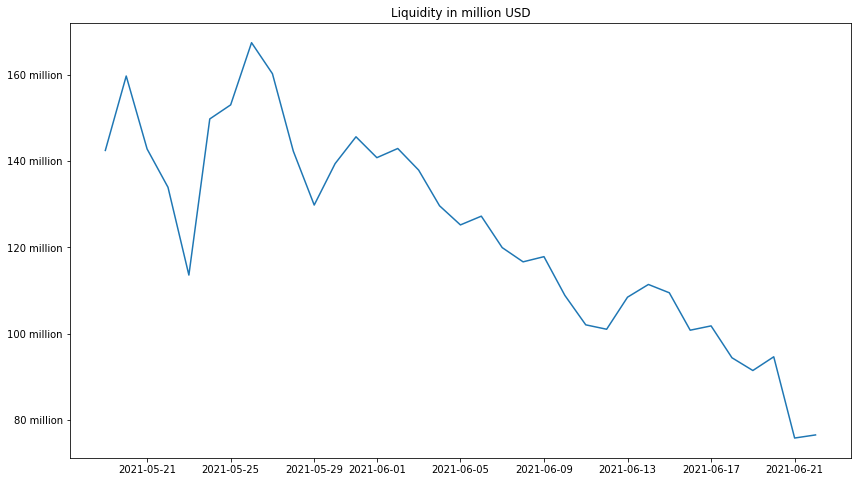

In [148]:
f = plt.figure(figsize = (14,8))
ax1 = f.add_subplot()
plt.plot(data.iloc[::-1,-1])

def y_format(x,y):
    return '{} million'.format(int(x/(10**6)))

ax1.yaxis.set_major_formatter(tick.FuncFormatter(y_format))
plt.title('Daily Liquidity in million USD')
plt.show()

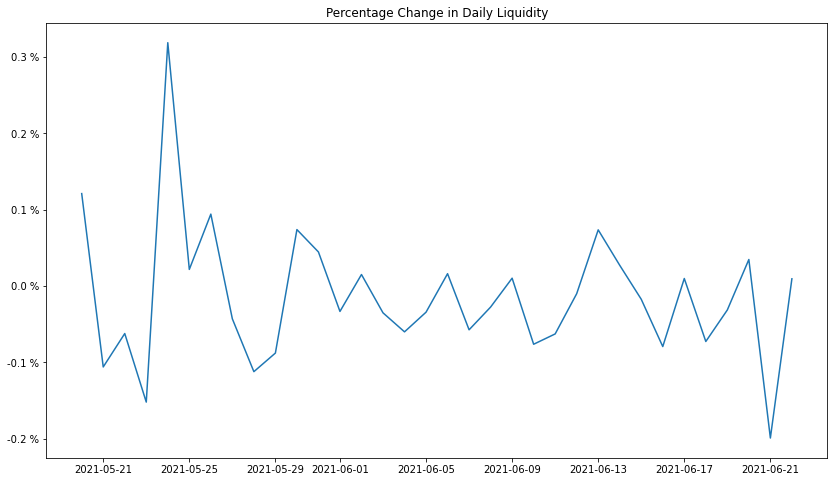

In [163]:
f = plt.figure(figsize = (14,8))
ax1 = f.add_subplot()
plt.plot(data.iloc[::-1,-1].pct_change())

def y_format(x,y):
    return '{:.1f} %'.format(x)

ax1.yaxis.set_major_formatter(tick.FuncFormatter(y_format))
plt.title('Percentage Change in Daily Liquidity')
plt.show()

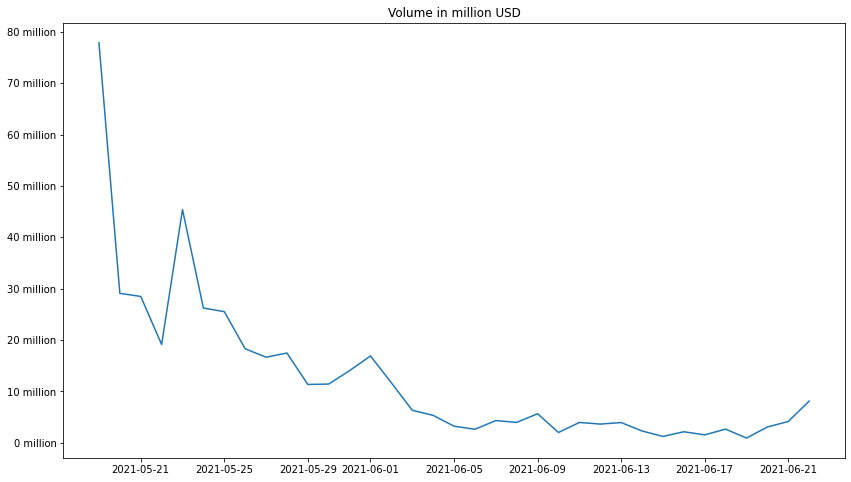

In [149]:
f = plt.figure(figsize = (14,8))
ax1 = f.add_subplot()
plt.plot(data.iloc[::-1,2])

def y_format(x,y):
    return '{} million'.format(int(x/(10**6)))

ax1.yaxis.set_major_formatter(tick.FuncFormatter(y_format))
plt.title('Daily Volume in million USD')
plt.show()

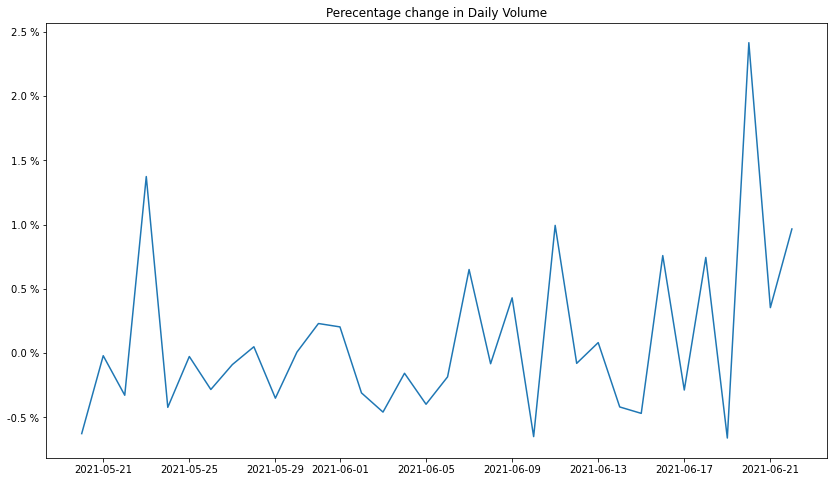

In [164]:
f = plt.figure(figsize = (14,8))
ax1 = f.add_subplot()
plt.plot(data.iloc[::-1,2].pct_change())

def y_format(x,y):
    return '{:.1f} %'.format(x)

ax1.yaxis.set_major_formatter(tick.FuncFormatter(y_format))
plt.title('Perecentage change in Daily Volume')
plt.show()

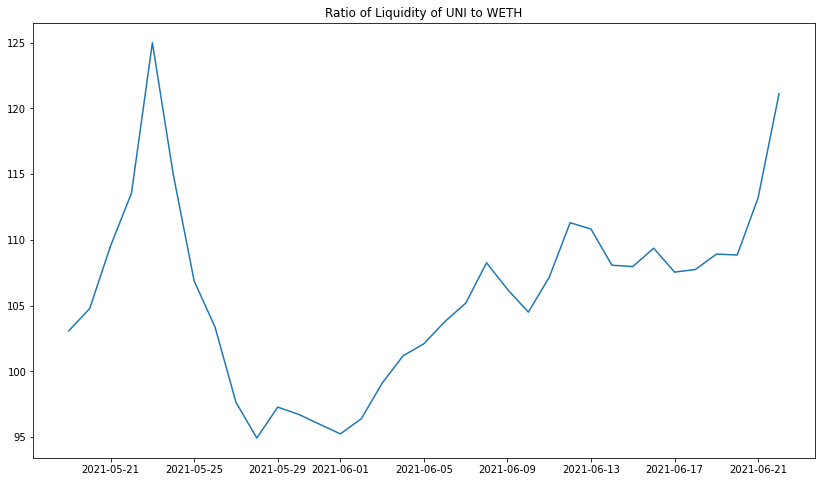

In [150]:
f = plt.figure(figsize = (14,8))
ax1 = f.add_subplot()
plt.plot(data.iloc[::-1,0]/data.iloc[::-1,1])

plt.title('Ratio of Liquidity of UNI to WETH')
plt.show()

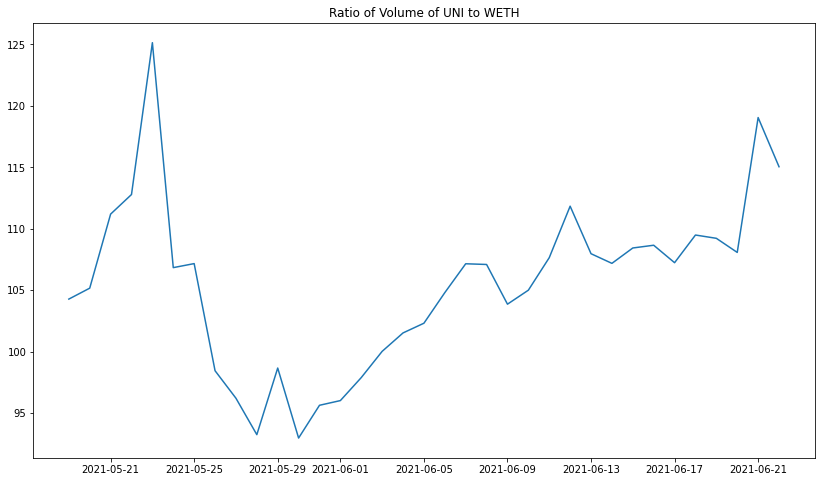

In [165]:
f = plt.figure(figsize = (14,8))
ax1 = f.add_subplot()
plt.plot(data.iloc[::-1,3]/data.iloc[::-1,4])

plt.title('Ratio of Volume of UNI to WETH')
plt.show()

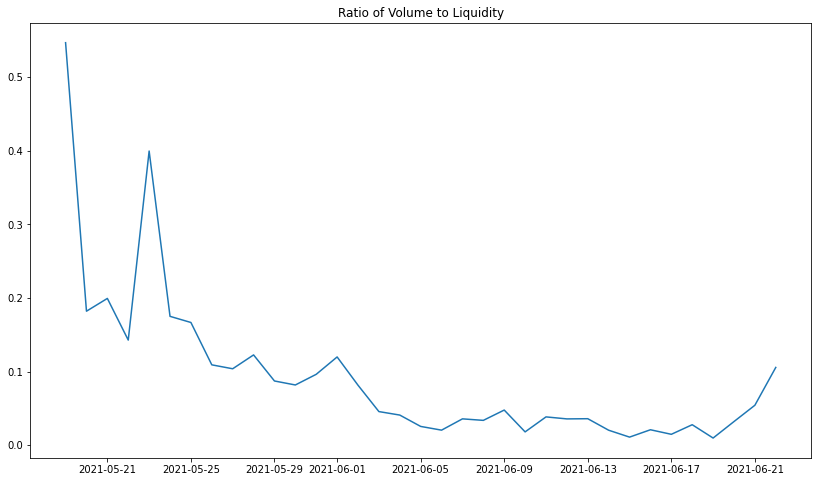

In [168]:
f = plt.figure(figsize = (14,8))
ax1 = f.add_subplot()
plt.plot(data.iloc[::-1,2]/data.iloc[::-1,-1])

plt.title('Ratio of Volume to Liquidity')
plt.show()

Inferences